In [1]:
import glob
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline
!ls



heat maps.ipynb heatmaps


In [2]:
#! source activate env 
#! pip install opencv-contrib-python

In [3]:
imageName= glob.glob("./heatmaps/*.jpg")

In [4]:
len(imageName)

197

In [5]:
def maxAreaOfIsland(g):
    rc = len(g)
    if not rc: return 0
    cc = len(g[0])
    if not cc: return 0
        
    mx = 0
    def dfs(g, r0, c0, mx):
        nonlocal rc, cc
        ##if g[r0][c0] != 0: return mx
        if g[r0][c0] != 1: return mx
            
        st = [(r0, c0)]
        g[r0][c0] = -1
            
        def push(g, st, r, c):
            ##if r < 0 or r == rc or c < 0 or c == cc or g[r][c] != 0: return
            if r < 0 or r == rc or c < 0 or c == cc or g[r][c] != 1: return
            g[r][c] = -1
            st.append((r, c))
                
        cn = 0
            
        while st:
            r, c = st.pop()
            cn += 1
                
            for dx, dy in ((-1, 0), (1, 0), (0, -1), (0, 1)):
                push(g, st, r + dx, c + dy)
                    
        return max(mx, cn)
        
    for r in range(rc):
        for c in range(cc):
            mx = dfs(g, r, c, mx)
        
    return mx

In [6]:
siyang = {}
for img in imageName:
    imgheatmap = cv2.imread(img,0)
    la = maxAreaOfIsland(imgheatmap)
    print(len(siyang)/len(imageName))
    siyang[img.replace('./heatmaps/','')] = la
    

0.0
0.005076142131979695
0.01015228426395939
0.015228426395939087
0.02030456852791878
0.025380710659898477
0.030456852791878174
0.03553299492385787
0.04060913705583756
0.04568527918781726
0.050761421319796954
0.05583756345177665
0.06091370558375635
0.06598984771573604
0.07106598984771574
0.07614213197969544
0.08121827411167512
0.08629441624365482
0.09137055837563451
0.09644670050761421
0.10152284263959391
0.1065989847715736
0.1116751269035533
0.116751269035533
0.1218274111675127
0.12690355329949238
0.1319796954314721
0.13705583756345177
0.14213197969543148
0.14720812182741116
0.15228426395939088
0.15736040609137056
0.16243654822335024
0.16751269035532995
0.17258883248730963
0.17766497461928935
0.18274111675126903
0.18781725888324874
0.19289340101522842
0.19796954314720813
0.20304568527918782
0.20812182741116753
0.2131979695431472
0.2182741116751269
0.2233502538071066
0.22842639593908629
0.233502538071066
0.23857868020304568
0.2436548223350254
0.24873096446700507
0.25380710659898476
0.2

In [13]:
siyang

{'189.jpg': 0,
 '162.jpg': 0,
 '176.jpg': 0,
 '1019.jpg': 16,
 '1025.jpg': 48,
 '1031.jpg': 17,
 '1030.jpg': 1,
 '1024.jpg': 8,
 '1018.jpg': 32,
 '177.jpg': 0,
 '163.jpg': 0,
 '188.jpg': 0,
 '149.jpg': 0,
 '175.jpg': 0,
 '161.jpg': 0,
 '1032.jpg': 17,
 '1026.jpg': 25,
 '1027.jpg': 5,
 '1033.jpg': 4,
 '160.jpg': 0,
 '174.jpg': 0,
 '148.jpg': 0,
 '170.jpg': 0,
 '164.jpg': 0,
 '158.jpg': 0,
 '1037.jpg': 9,
 '1023.jpg': 17,
 '1022.jpg': 16,
 '1036.jpg': 16,
 '159.jpg': 0,
 '165.jpg': 0,
 '171.jpg': 0,
 '167.jpg': 0,
 '173.jpg': 0,
 '1020.jpg': 16,
 '1034.jpg': 16,
 '1008.jpg': 0,
 '1009.jpg': 0,
 '1035.jpg': 40,
 '1021.jpg': 32,
 '172.jpg': 0,
 '166.jpg': 24,
 '14.jpg': 16,
 '129.jpg': 8,
 '101.jpg': 16,
 '115.jpg': 24,
 '1046.jpg': 8,
 '1052.jpg': 0,
 '1085.jpg': 0,
 '1084.jpg': 0,
 '1053.jpg': 8,
 '1047.jpg': 16,
 '114.jpg': 16,
 '100.jpg': 16,
 '128.jpg': 32,
 '15.jpg': 24,
 '17.jpg': 8,
 '116.jpg': 37,
 '102.jpg': 7,
 '1079.jpg': 16,
 '1051.jpg': 25,
 '1045.jpg': 7,
 '1086.jpg': 0,
 '1

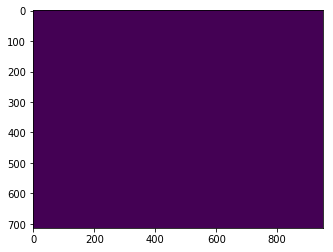

In [14]:

plt.imshow(imgheatmap)
plt.show()

In [15]:
import csv


w = csv.writer(open("siyang197.csv", "w"))
for key, val in siyang.items():
    w.writerow([key, val])



197